In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo


In [3]:
import sys
import os

import numpy as np
import pandas as pd
import random
import tensorflow as tf

from tensorflow import keras
from keras import layers
from scipy import stats

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

from scripts.CustomCallbacks import CustomLogger
import scripts.utils as utils
import scripts.Slopes as Slopes

from tqdm import tqdm
import json

from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import operator
import statsmodels.api as sm

utils.reset_seeds(0)
pd.set_option('display.max_columns', 50)

In [4]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [5]:
sns.set_context("paper")
sns.set_style('ticks')

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams["font.family"] = "Calibri"
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.title_fontsize'] = 15
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['savefig.format'] = 'png'
plt.rcParams['savefig.dpi'] = 600

In [6]:
paths = ["andmed/all_four/const_order.csv", "andmed/all_four/const_reverse.csv", "andmed/all_four/sin_order.csv", "andmed/all_four/sin_reverse.csv"]
df_koik = pd.concat([utils.read_aggregated_data(path) for path in paths], axis=0)
df_koik.shape

(1896, 41)

In [8]:
df_koik = pd.DataFrame()
for p in paths:
    df = utils.read_aggregated_data(p)
    df["experiment"] = p.split("/")[2].split(".")[0]
    df_koik = pd.concat([df_koik, df], axis=0)

C:\Users\troosma\AppData\Local\Temp\ipykernel_25820\2285914639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["points_in_diff_region"] += 1


Text(0.5, 0.98, 'Relatiivne viga piirkonnas A')

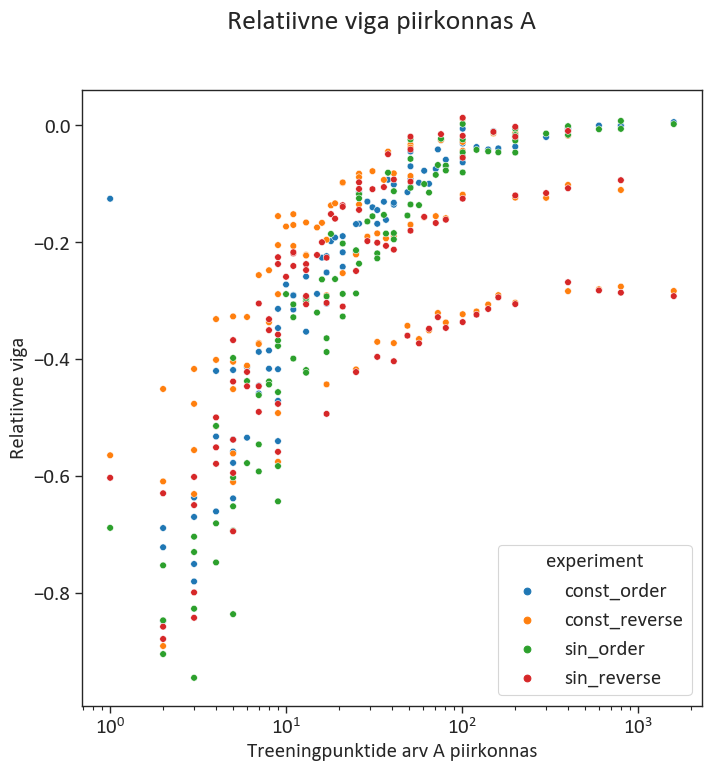

In [19]:
test_df = df_koik[df_koik.region=="A"]
test_df["points_in_diff_region"] += 1

fig, ax = plt.subplots()
ax.set_xscale("log")
sns.scatterplot(data = test_df, x="points_in_diff_region", y="rel_diff_in_a",hue="experiment")
plt.ylabel("Relatiivne viga")
plt.xlabel("Treeningpunktide arv A piirkonnas")
plt.suptitle("Relatiivne viga piirkonnas A")
# plt.savefig("plots/kirjalik_osa/all_rel_error_A.png")
# plt.show()
# plt.clf()

C:\Users\troosma\AppData\Local\Temp\ipykernel_25820\2374978790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["points_in_diff_region"] += 1


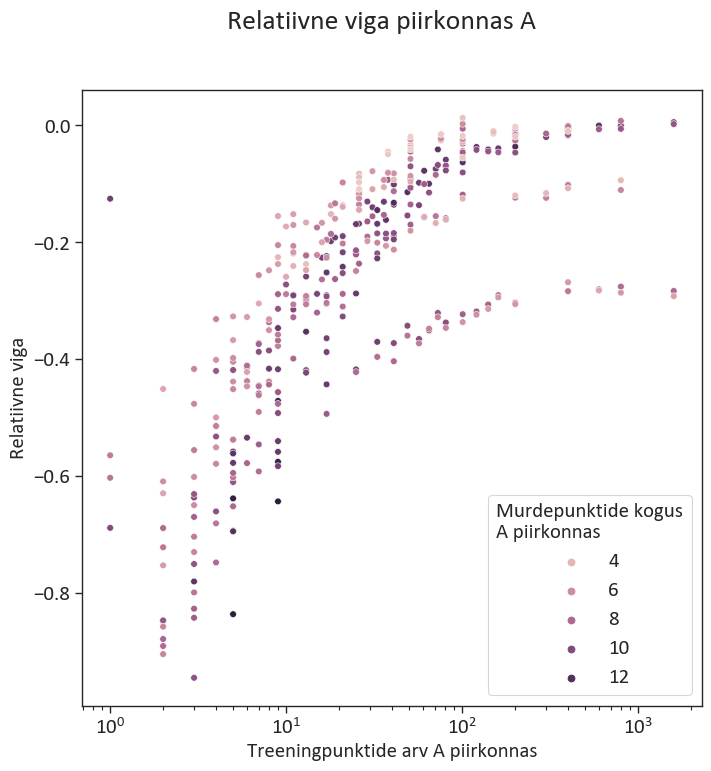

<Figure size 800x800 with 0 Axes>

In [57]:
# joonis mis läheb seletamaks et see on kas log või 1/x skaala
test_df = df_koik[df_koik.region=="A"]
test_df["points_in_diff_region"] += 1

fig, ax = plt.subplots()
ax.set_xscale("log")

sns.scatterplot(data = test_df, x="points_in_diff_region", y="rel_diff_in_a",hue="bpoints_in_a")
plt.legend().set_title("Murdepunktide kogus\nA piirkonnas")
plt.ylabel("Relatiivne viga")
plt.xlabel("Treeningpunktide arv A piirkonnas")
plt.suptitle("Relatiivne viga piirkonnas A")
plt.savefig("plots/kirjalik_osa/all_rel_error_A.png")
plt.show()
plt.clf()

In [68]:
max(test_df["points_in_diff_region"])

1602.0

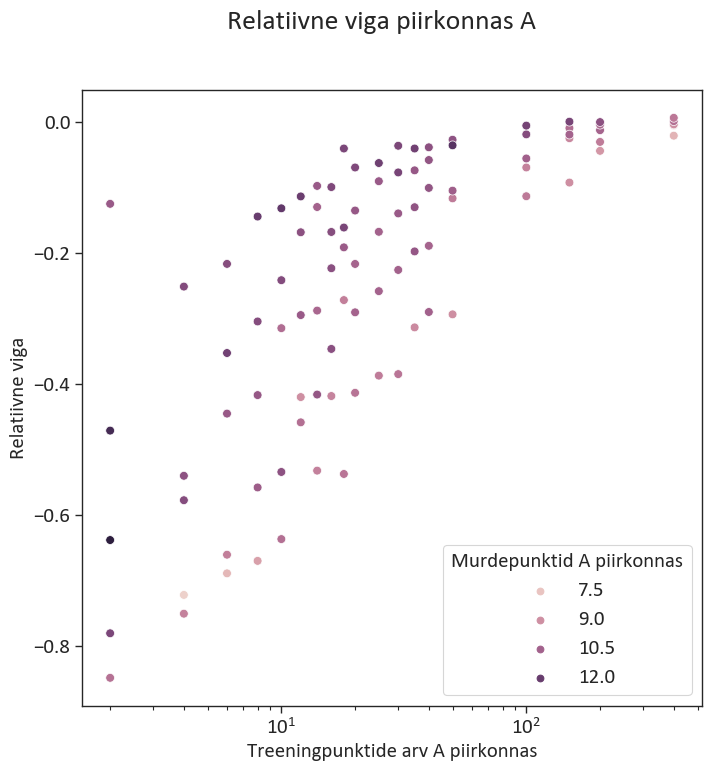

<Figure size 800x800 with 0 Axes>

In [65]:
# joonis mis läheb seletamaks et see on kas log või 1/x skaala
test_df = utils.read_aggregated_data("andmed/all_four/const_order.csv")
test_df = test_df[test_df.region=="A"]
test_df["points_in_diff_region"] += 1

fig, ax = plt.subplots()
ax.set_xscale("log")
sns.scatterplot(data = test_df, x="points_in_equal_regions", y="rel_diff_in_a",hue="bpoints_in_a", s=40)
plt.ylabel("Relatiivne viga")
plt.xlabel("Treeningpunktide arv A piirkonnas")
plt.suptitle("Relatiivne viga piirkonnas A")
plt.legend(title="Murdepunktid A piirkonnas")
plt.savefig("plots/kirjalik_osa/bp_hue_rel_error_A.png")
plt.show()
plt.clf()

In [7]:
paths_inimkeeles = ["konstantne funktsioon kasvava müraga", "konstantne funktsioon kahaneva müraga",
                     "seiinus funktsioon kasvava müraga", "siiinus funktsioon kahaneva müraga"]
eksperiment_inimkeeles = ["Eksperiment " + str(i) for i in range(1,5)]

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo\env\lib\site-packages\matplotlib_inline\backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
C:\Users\troosma\AppData\Local\Temp\ipykernel_25820\655317641.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["points_in_diff_region"] += 1
C:\Users\troosma\AppData\Local\Temp\ipykernel_25820\655317641.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

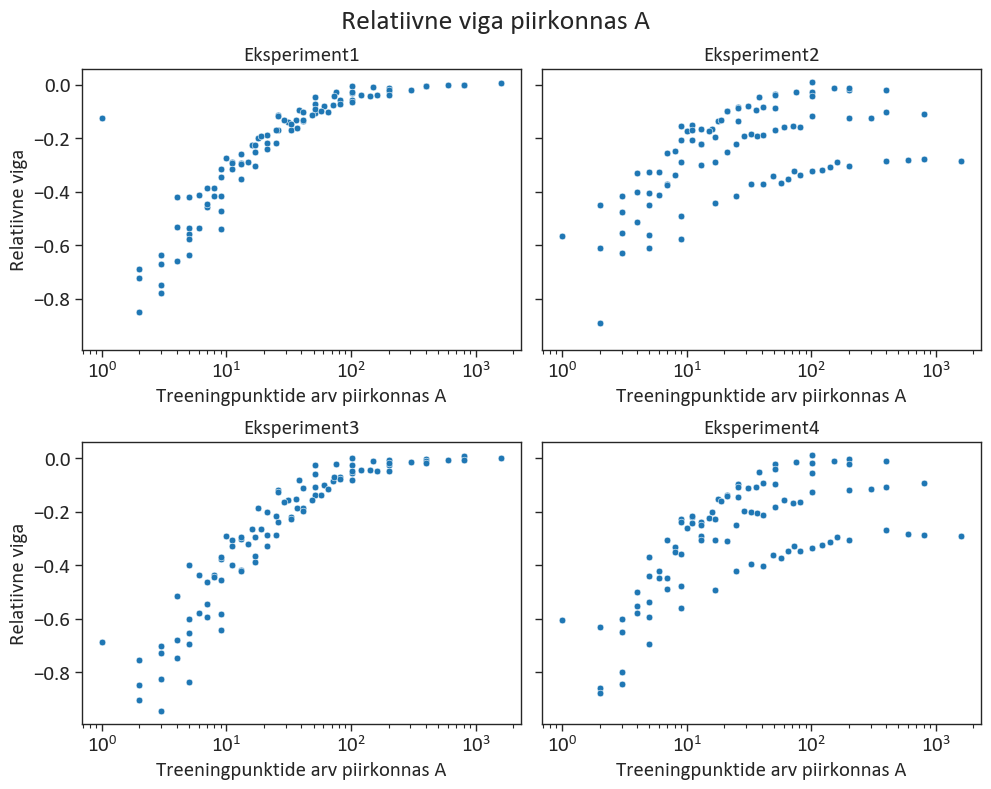

<Figure size 800x800 with 0 Axes>

In [46]:
# joonis mis läheb seletamaks et see on kas log või 1/x skaala
# TODO viia samale skaalale nad kõik
fig, ax = plt.subplots(2,2, figsize=(10,8), constrained_layout=True, tight_layout=True, sharey=True)
for i in range(4):

    df = utils.read_aggregated_data(paths[i])
    test_df = df_koik[(df_koik.region=="A")&(df_koik.experiment==paths[i].split("/")[2].split(".")[0])]
    test_df["points_in_diff_region"] += 1
    ax[i//2][i%2].set_xscale("log")

    sns.scatterplot(data = test_df, x="points_in_diff_region", y="rel_diff_in_a",ax=ax[i//2][i%2])
    ax[i//2][i%2].set_ylabel("Relatiivne viga")
    ax[i//2][i%2].set_xlabel("Treeningpunktide arv piirkonnas A")
    ax[i//2][i%2].set_title(f"{eksperiment_inimkeeles[i]}")


# ax[0][0].legend([], [], frameon=False)
# # ax[0][1].legend([],[], frameon=False)
# ax[0][1].get_legend().set_title(None)

# ax[1][0].legend([], [], frameon=False)
# ax[1][1].legend([], [], frameon=False)
# sns.move_legend(ax[0][1], "upper left", bbox_to_anchor=(1, 0.6))


plt.suptitle("Relatiivne viga piirkonnas A")
plt.savefig(f"plots/kirjalik_osa/eraldi_rel_error_A.png")
plt.show()
plt.clf()

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo\env\lib\site-packages\matplotlib_inline\backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
C:\Users\troosma\AppData\Local\Temp\ipykernel_25820\504103172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["points_in_diff_region"] += 1


(95, 42)


C:\Users\troosma\AppData\Local\Temp\ipykernel_25820\504103172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["points_in_diff_region"] += 1


(95, 42)


C:\Users\troosma\AppData\Local\Temp\ipykernel_25820\504103172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["points_in_diff_region"] += 1


(95, 42)


C:\Users\troosma\AppData\Local\Temp\ipykernel_25820\504103172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["points_in_diff_region"] += 1


(95, 42)


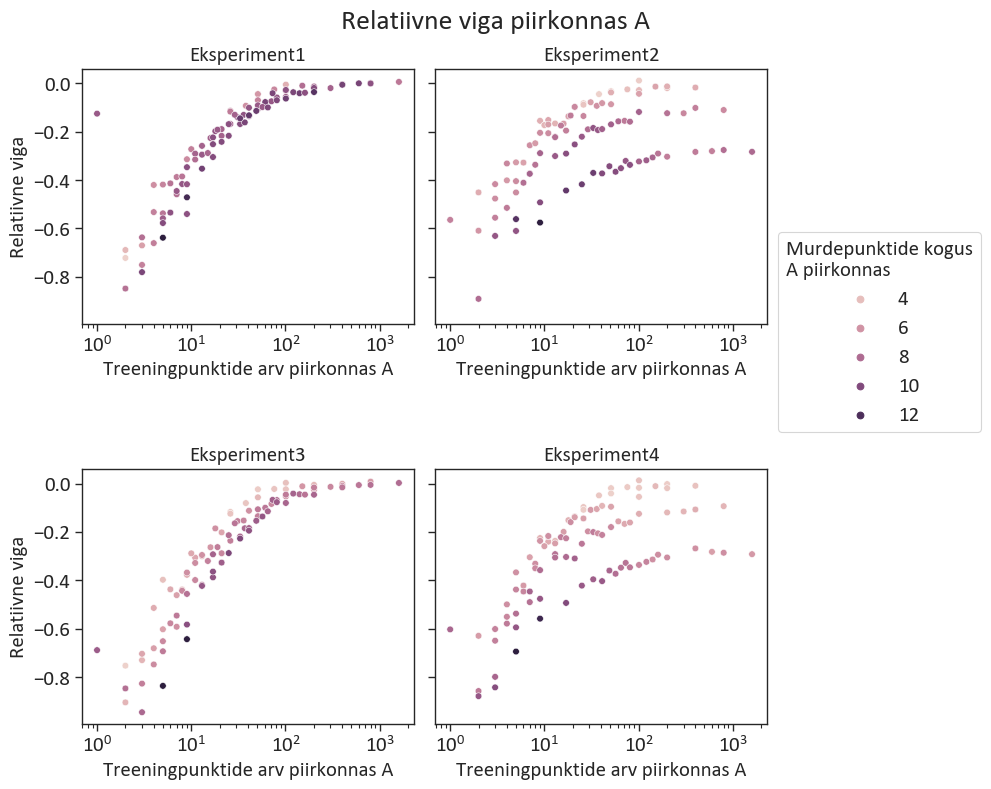

<Figure size 800x800 with 0 Axes>

In [59]:
# joonis mis läheb seletamaks et see on kas log või 1/x skaala
# TODO viia samale skaalale nad kõik
fig, ax = plt.subplots(2,2, figsize=(10,8), constrained_layout=True, tight_layout=True, sharey=True)
for i in range(4):

    df = utils.read_aggregated_data(paths[i])
    test_df = df_koik[(df_koik.region=="A")&(df_koik.experiment==paths[i].split("/")[2].split(".")[0])]
    test_df["points_in_diff_region"] += 1
    print(test_df.shape)
    ax[i//2][i%2].set_xscale("log")

    sns.scatterplot(data = test_df, x="points_in_diff_region", y="rel_diff_in_a",ax=ax[i//2][i%2], hue="bpoints_in_a")
    ax[i//2][i%2].set_ylabel("Relatiivne viga")
    ax[i//2][i%2].set_xlabel("Treeningpunktide arv piirkonnas A")
    ax[i//2][i%2].set_title(f"{eksperiment_inimkeeles[i]}")


ax[0][0].legend([], [], frameon=False)
# ax[0][1].legend([],[], frameon=False)
ax[0][1].get_legend().set_title("Murdepunktide kogus\nA piirkonnas")

ax[1][0].legend([], [], frameon=False)
ax[1][1].legend([], [], frameon=False)
sns.move_legend(ax[0][1], "upper left", bbox_to_anchor=(1, 0.4))


plt.suptitle("Relatiivne viga piirkonnas A")
plt.savefig(f"plots/kirjalik_osa/eraldi_rel_error_A.png")
plt.show()
plt.clf()

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo\env\lib\site-packages\matplotlib_inline\backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
C:\Users\troosma\AppData\Local\Temp\ipykernel_25820\2720989499.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["points_in_diff_region"] += 1


(95, 42)


C:\Users\troosma\AppData\Local\Temp\ipykernel_25820\2720989499.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["points_in_diff_region"] += 1


(95, 42)


C:\Users\troosma\AppData\Local\Temp\ipykernel_25820\2720989499.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["points_in_diff_region"] += 1


(95, 42)


C:\Users\troosma\AppData\Local\Temp\ipykernel_25820\2720989499.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["points_in_diff_region"] += 1


(95, 42)


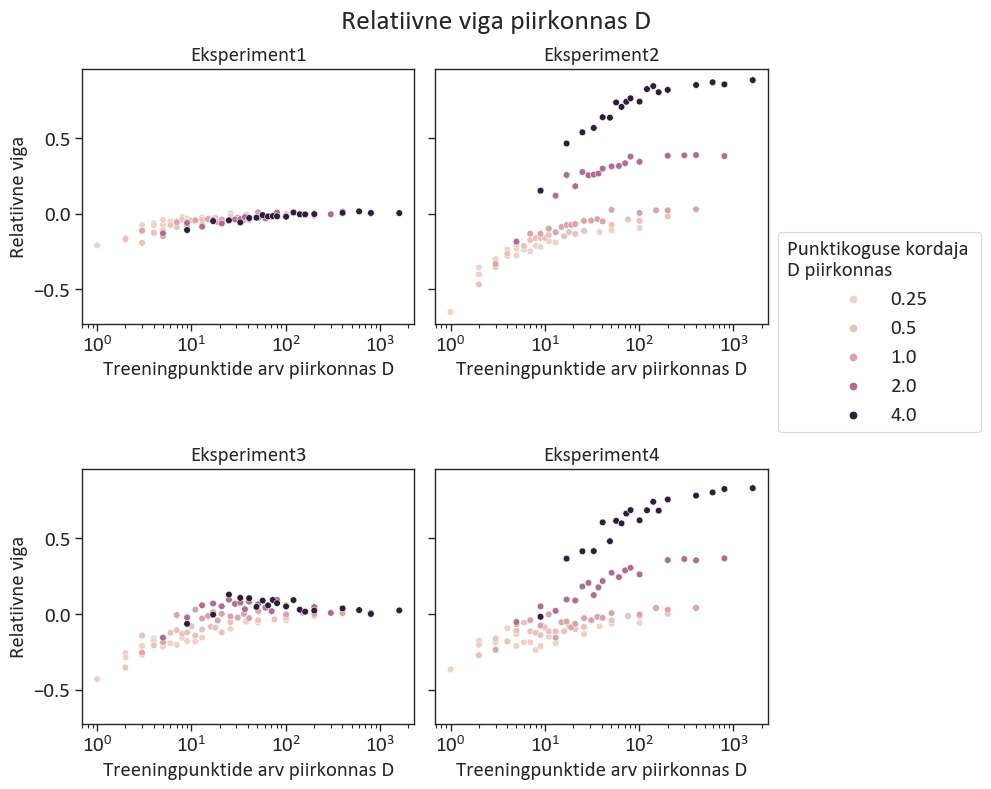

<Figure size 800x800 with 0 Axes>

In [66]:
# joonis mis läheb seletamaks et see on kas log või 1/x skaala
# TODO viia samale skaalale nad kõik
fig, ax = plt.subplots(2,2, figsize=(10,8), constrained_layout=True, tight_layout=True, sharey=True)
for i in range(4):

    df = utils.read_aggregated_data(paths[i])
    test_df = df_koik[(df_koik.region=="D")&(df_koik.experiment==paths[i].split("/")[2].split(".")[0])]
    test_df["points_in_diff_region"] += 1
    print(test_df.shape)
    ax[i//2][i%2].set_xscale("log")

    sns.scatterplot(data = test_df, x="points_in_diff_region", y="rel_diff_in_d",ax=ax[i//2][i%2], hue="multiplier")
    ax[i//2][i%2].set_ylabel("Relatiivne viga")
    ax[i//2][i%2].set_xlabel("Treeningpunktide arv piirkonnas D")
    ax[i//2][i%2].set_title(f"{eksperiment_inimkeeles[i]}")


ax[0][0].legend([], [], frameon=False)
# ax[0][1].legend([],[], frameon=False)
ax[0][1].get_legend().set_title("Punktikoguse kordaja \nD piirkonnas")

ax[1][0].legend([], [], frameon=False)
ax[1][1].legend([], [], frameon=False)
sns.move_legend(ax[0][1], "upper left", bbox_to_anchor=(1, 0.4))

plt.suptitle("Relatiivne viga piirkonnas D")
plt.savefig(f"plots/kirjalik_osa/eraldi_rel_error_multiplier_d.png")
plt.show()
plt.clf()

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo\env\lib\site-packages\matplotlib_inline\backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
C:\Users\troosma\AppData\Local\Temp\ipykernel_28376\3341811338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["points_in_diff_region"] += 1
C:\Users\troosma\AppData\Local\Temp\ipykernel_28376\3341811338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

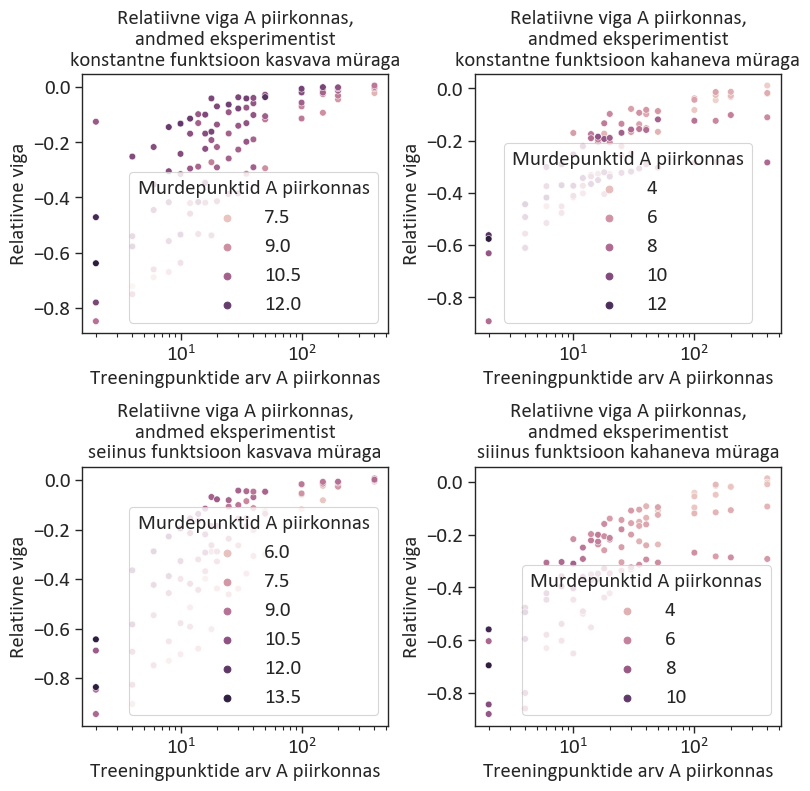

<Figure size 800x800 with 0 Axes>

In [72]:
# joonis mis läheb seletamaks et see on kas log või 1/x skaala
# TODO viia samale skaalale nad kõik
fig, ax = plt.subplots(2,2, constrained_layout=True, tight_layout=True)
for i in range(4):

    df = utils.read_aggregated_data(paths[i])
    test_df = df[df.region=="A"]
    test_df["points_in_diff_region"] += 1
    ax[i//2][i%2].set_xscale("log")

    sns.scatterplot(data = test_df, x="points_in_equal_regions", y="rel_diff_in_a",hue="bpoints_in_a", ax=ax[i//2][i%2])
    ax[i//2][i%2].set_ylabel("Relatiivne viga")
    ax[i//2][i%2].set_xlabel("Treeningpunktide arv A piirkonnas")
    ax[i//2][i%2].set_title(f"Relatiivne viga A piirkonnas,\nandmed eksperimentist\n{paths_inimkeeles[i]}")
    ax[i//2][i%2].legend(title="Murdepunktid A piirkonnas")

plt.savefig(f"plots/kirjalik_osa/hue_eraldi_rel_error_A.png")
plt.show()
plt.clf()

In [8]:
mugavad_regioonid = {
        'a': (['b'], ['c']),
        'b': (['a', 'c'], ['d']),
        'c': (['b', 'd'], ['a', 'e']),
        'd': (['c', 'e'], ['b']),
        'e': (['d'], ['c']),
    }

In [102]:
# df = pd.concat([utils.read_aggregated_data(path) for path in paths], axis=0)
df['exp'] = "3"


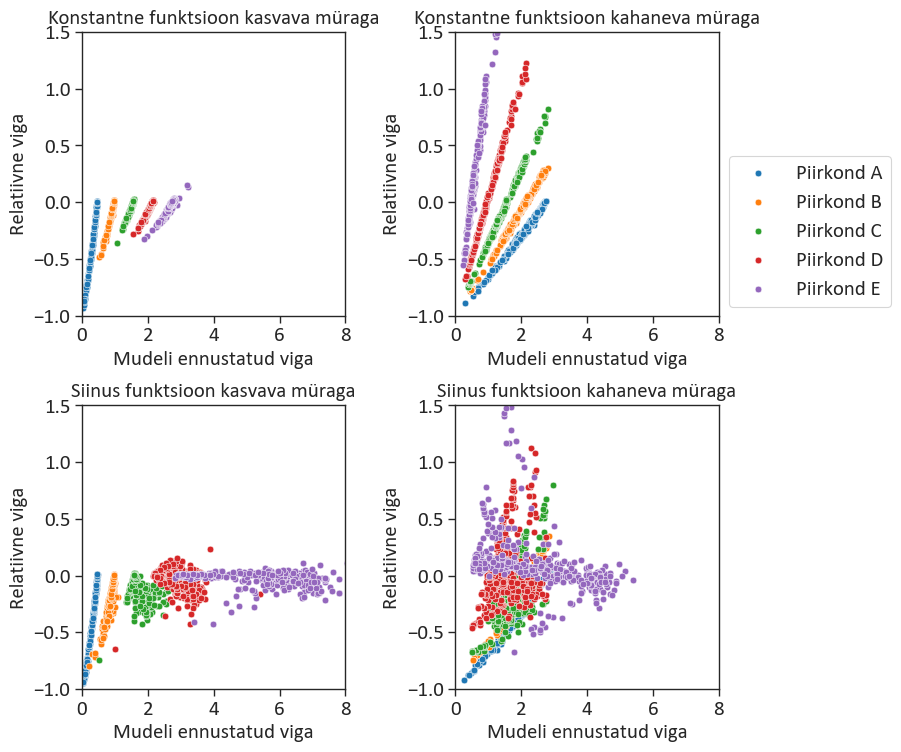

In [142]:
fig, ax = plt.subplots(2, 2)
fig.tight_layout(pad=4.0)
plt.setp(ax, xlim=[0, 8], ylim=[-1, 1.5])

df = utils.read_aggregated_data(paths[0])

for reg in ['a', 'b', 'c', 'd', 'e']:
    dfX, dfy = utils.transform_no_scaling(df, reg, *mugavad_regioonid[reg])
    dfX.head()
    sns.scatterplot(x=dfX.my_raw_mean2, y=dfy,
                    label=f"Piirkond {reg.capitalize()}", ax=ax[0][0])

df = utils.read_aggregated_data(paths[1])

for reg in ['a', 'b', 'c', 'd', 'e']:
    dfX, dfy = utils.transform_no_scaling(df, reg, *mugavad_regioonid[reg])
    dfX.head()
    sns.scatterplot(x=dfX.my_raw_mean2, y=dfy,
                    label=f"Piirkond {reg.capitalize()}", ax=ax[0][1])

df = utils.read_aggregated_data(paths[2])

for reg in ['a', 'b', 'c', 'd', 'e']:
    dfX, dfy = utils.transform_no_scaling(df, reg, *mugavad_regioonid[reg])
    dfX.head()
    sns.scatterplot(x=dfX.my_raw_mean2, y=dfy,
                    label=f"Piirkond {reg.capitalize()}", ax=ax[1][0])

df = utils.read_aggregated_data(paths[3])

for reg in ['a', 'b', 'c', 'd', 'e']:
    dfX, dfy = utils.transform_no_scaling(df, reg, *mugavad_regioonid[reg])
    dfX.head()
    sns.scatterplot(x=dfX.my_raw_mean2, y=dfy,
                    label=f"Piirkond {reg.capitalize()}", ax=ax[1][1])

ax[0][0].legend([], [], frameon=False)
# ax[0][1].legend([],[], frameon=False)
ax[1][0].legend([], [], frameon=False)
ax[1][1].legend([], [], frameon=False)
sns.move_legend(ax[0][1], "upper left", bbox_to_anchor=(1, 0.6))

ax[0][0].title.set_text("Konstantne funktsioon kasvava müraga")
ax[0][1].title.set_text("Konstantne funktsioon kahaneva müraga")
ax[1][0].title.set_text("Siinus funktsioon kasvava müraga")
ax[1][1].title.set_text("Siinus funktsioon kahaneva müraga")

ax[0][0].set_xlabel("Mudeli ennustatud viga")
ax[0][1].set_xlabel("Mudeli ennustatud viga")
ax[1][0].set_xlabel("Mudeli ennustatud viga")
ax[1][1].set_xlabel("Mudeli ennustatud viga")

ax[0][0].set_ylabel("Relatiivne viga")
ax[0][1].set_ylabel("Relatiivne viga")
ax[1][0].set_ylabel("Relatiivne viga")
ax[1][1].set_ylabel("Relatiivne viga")

plt.savefig("plots/kirjalik_osa/rel_vs_raw2.png")


C:\Users\troosma\AppData\Local\Temp\ipykernel_33028\2353168698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["points_in_diff_region"] += 1


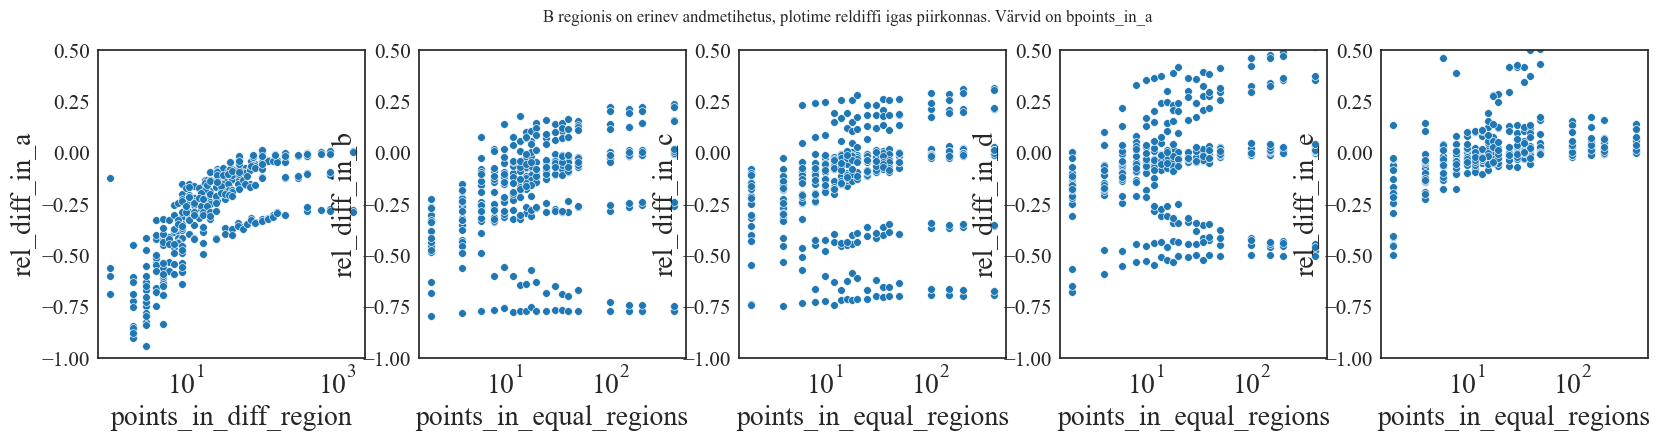

In [7]:
test_df = df_koik[df_koik.region=="A"]
test_df["points_in_diff_region"] += 1

fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.5) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",  y="rel_diff_in_a", ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="rel_diff_in_b", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="rel_diff_in_c", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="rel_diff_in_d", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="rel_diff_in_e", ax=ax[4])
plt.suptitle("B regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_a")
plt.show()

C:\Users\troosma\AppData\Local\Temp\ipykernel_25328\2353168698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["points_in_diff_region"] += 1


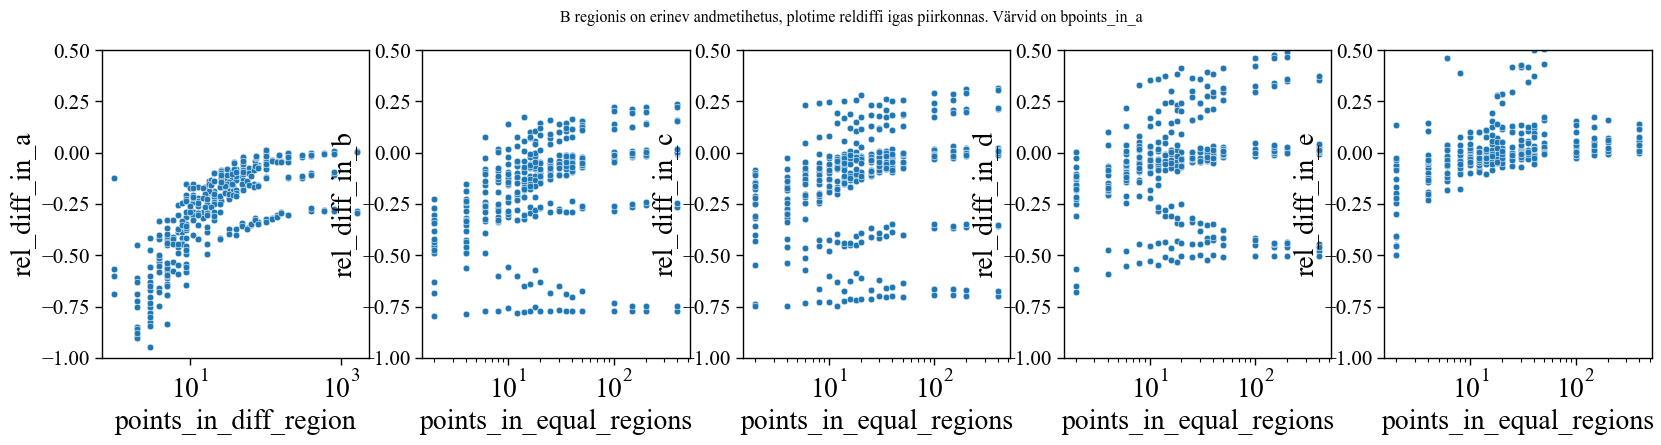

In [ ]:
test_df = df_koik[df_koik.region=="A"]
test_df["points_in_diff_region"] += 1

fig, ax = plt.subplots(1,5, figsize=(20, 4))

[a.set_xscale( "log") for a in ax]
[a.set_ylim(-1, 0.5) for a in ax]
sns.scatterplot(data = test_df, x="points_in_diff_region",  y="rel_diff_in_a", ax=ax[0])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="rel_diff_in_b", ax=ax[1])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="rel_diff_in_c", ax=ax[2])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="rel_diff_in_d", ax=ax[3])
sns.scatterplot(data = test_df, x="points_in_equal_regions",y="rel_diff_in_e", ax=ax[4])
plt.suptitle("B regionis on erinev andmetihetus, plotime reldiffi igas piirkonnas. Värvid on bpoints_in_a")
plt.show()

TypeError: lmplot() got an unexpected keyword argument 'ax'

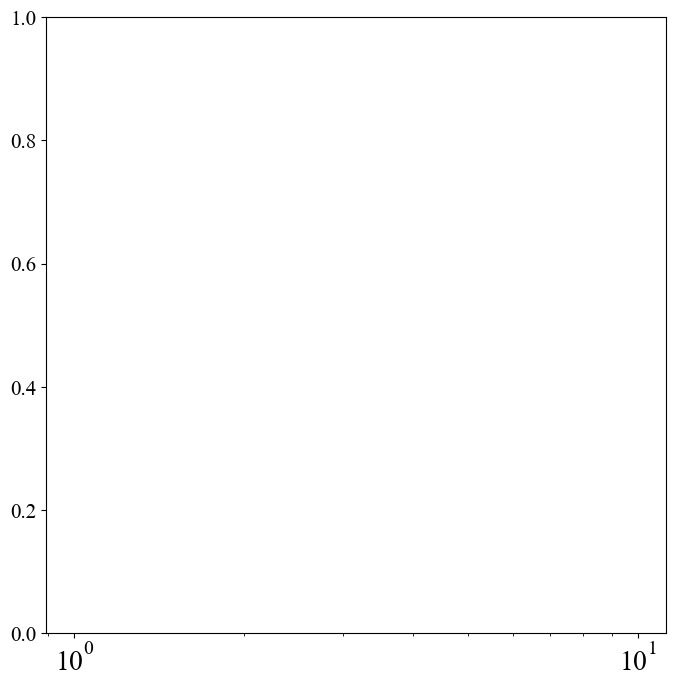

In [34]:
fig, ax = plt.subplots()
ax.set_xscale( "log")
# sns.regplot(data=test_df, x="points_in_diff_region",
#             y="rel_diff_in_a", marker='D', color='blue')
# sns.despine(right=True)
# plt.show()
# plt.clf()
sns.lmplot(data=test_df, x="points_in_diff_region",y="rel_diff_in_a",logx=True, ax=ax)


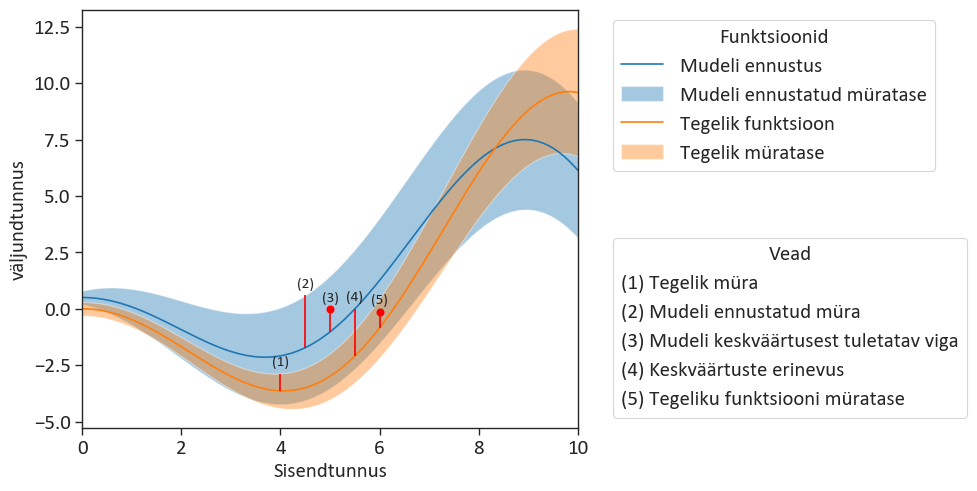

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

kogus = 10000
x = np.linspace(0, 10, kogus)
y_tegelik = x*np.cos(0.5*x+0.5*np.pi)
y_mudel = 0.8 * x*np.cos(0.55*x+0.5*np.pi) + 0.5


def noise_tegelik(x): return np.abs(0.3 + 0.3 * x * np.sin(0.1*x))
def noise_mudel(x): return np.abs(0.3 + 0.5 * x * np.cos(0.1*x))

# noise_tegelik = np.random.normal(0, noise_tegelik(x), kogus)
# noise_tegelik = np.abs(noise_tegelik)
# noise_mudel = np.random.normal(0, noise_mudel(x), kogus)
# noise_mudel = np.abs(noise_mudel)

# kernel_size = 3000
# kernel = np.ones(kernel_size) / kernel_size
# noise_tegelik = np.convolve(noise_tegelik, kernel, mode='same')
# noise_mudel = np.convolve(noise_mudel, kernel, mode='same')


a1, = plt.plot(x, y_mudel, label="Mudeli ennustus")
b1 = plt.fill_between(x, y_mudel-noise_mudel(x), y_mudel+noise_mudel(x),
                      alpha=0.4, label="Mudeli ennustatud müratase")
a2, = plt.plot(x, y_tegelik, label="Tegelik funktsioon")
b2 = plt.fill_between(x, y_tegelik-noise_tegelik(x), y_tegelik +
                      noise_tegelik(x), alpha=0.4, label="Tegelik müratase")
# sns.scatterplot(x=x, y=y_tegelik+noise_tegelik, ax=ax, color='blue')
# sns.scatterplot(x=x, y=y_tegelik-noise_tegelik, ax=ax, color='blue')
plt.xlim(0, 10)
legend1 = plt.legend(handles=[a1, b1, a2, b2], title='Funktsioonid',
                     loc='upper left', bbox_to_anchor=(1.05, 1))

e1 = plt.vlines(x[4000], y_tegelik[4000], y_tegelik[4000] +
                noise_tegelik(x[4000]), color='red', label="(1) Tegelik müra")
plt.text(x[4000], y_tegelik[4000]+noise_tegelik(x[4000]) +
         0.5, "(1)", fontsize=11, ha='center', va='center',)

e2 = plt.vlines(x[4500], y_mudel[4500], y_mudel[4500] +
                noise_mudel(x[4500]), color='red', label="(2) Mudeli ennustatud müra")
plt.text(x[4500], y_mudel[4500] + noise_mudel(x[4500]) +
         0.5, "(2)", fontsize=11, ha='center', va='center',)

delta1 = 1
e3 = plt.plot(x[5000], y_mudel[5000]+delta1, 'ro')
e3 = plt.vlines(x[5000], y_mudel[5000], y_mudel[5000]+delta1,
                color='red', label="(3) Mudeli keskväärtusest tuletatav viga")
plt.text(x[5000], y_mudel[5000]+delta1+0.5, "(3)",
         fontsize=11, ha='center', va='center',)

e4 = plt.vlines(x[5500], y_mudel[5500], y_tegelik[5500],
                color='red', label="(4) Keskväärtuste erinevus")
plt.text(x[5500], y_mudel[5500]+0.5, "(4)",
         fontsize=11, ha='center', va='center',)

delta2 = 0.7
plt.plot(x[6000], y_tegelik[6000]+delta2, 'ro')
e5 = plt.vlines(x[6000], y_tegelik[6000], y_tegelik[6000] +
                delta2, color='red', label="(5) Tegeliku funktsiooni müratase")
plt.text(x[6000], y_tegelik[6000]+delta2+0.5, "(5)",
         fontsize=11, ha='center', va='center',)

legend2 = plt.legend(handles=[e1, e2, e3, e4, e5],
                     title='Vead', loc='lower left', bbox_to_anchor=(1.05, 0), handlelength=0, handletextpad=0,)
for item in legend2.legendHandles:
    item.set_visible(False)

plt.gca().add_artist(legend1)

plt.xlabel("Sisendtunnus")
plt.ylabel("väljundtunnus")
plt.tight_layout()
plt.savefig("plots/kirjalik_osa/5x_error_explained.png")

In [ ]:
andmed\treenitud_mudelite_pildid\pildid_bakasse\const_order\70_4.0A_3.png


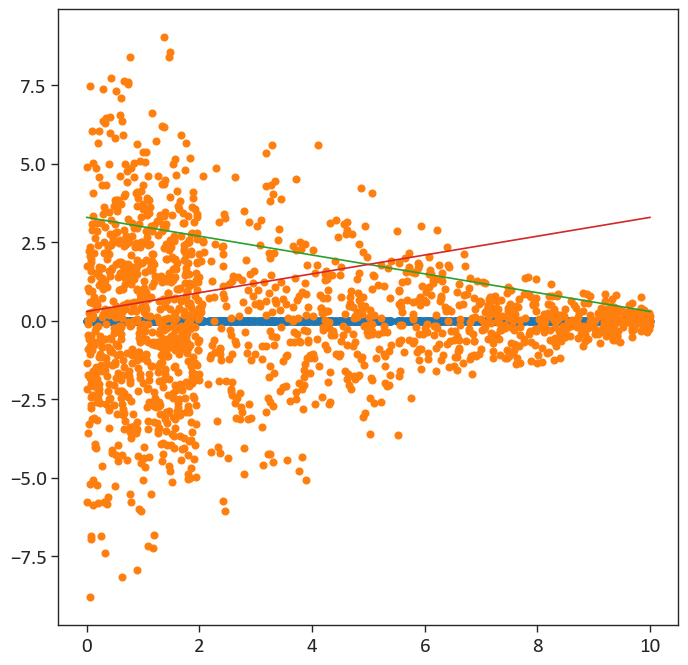

In [55]:
def fn(X):
    return 0*X


def noise_fn(X):
  
    return 0.3 * np.random.randn(len(X)) + 0.3* (10-X) * np.random.randn(len(X))

def create_x_train(train_size, different_place, different_multiplier=1, x_range=(0, 10), n_places=5, seed=None):
    # utils.reset_seeds(seed)

    keskmine_num = train_size/n_places  # A
    erinev_num = different_multiplier*keskmine_num  # B
    piirkond = (x_range[1]-x_range[0])/n_places
    piirkonnad = [(x_range[0]+i*piirkond, x_range[0]+(i+1)*piirkond)
                  for i in range(n_places)]
    #print(f"piirkond: {piirkond}")
    #print(f"piirkonnad: {piirkonnad}")

    X_train = []
    for idx, p in enumerate(piirkonnad):
        if idx == different_place:
            X_train.append(np.random.uniform(p[0], p[1], int(erinev_num)))
        else:
            X_train.append(np.random.uniform(p[0], p[1], int(keskmine_num)))

    X_train = np.concatenate(X_train)
    X_train.sort()
    return X_train
train_size = 1000
different_place = 0
different_multiplier = 4
seed = 0
# utils.reset_seeds(seed)
X = create_x_train(train_size, different_place=different_place,
                                     different_multiplier=different_multiplier, x_range=(0, 10), n_places=5, seed=seed)

plt.plot(X, fn(X), 'o')
seed=None
reverse_noise=True

if reverse_noise:
    y = fn(X) + noise_fn(X)
else:
    y = noise_fn(X)

plt.plot(X, y, 'o')
plt.plot(np.linspace(0,10), 0.3+0.3*np.linspace(10,0))
plt.plot(np.linspace(0,10), 0.3+0.3*np.linspace(0,10))

In [16]:
noise_fn(X[::-1])

array([-0.50296993,  0.08157612, -0.39434125, ...,  6.7337259 ,
        1.30144676,  6.47348149])

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo\env\lib\site-packages\matplotlib_inline\backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))


AxesSubplot(0.125,0.53;0.352273x0.35)
AxesSubplot(0.547727,0.53;0.352273x0.35)
AxesSubplot(0.125,0.11;0.352273x0.35)
AxesSubplot(0.547727,0.11;0.352273x0.35)


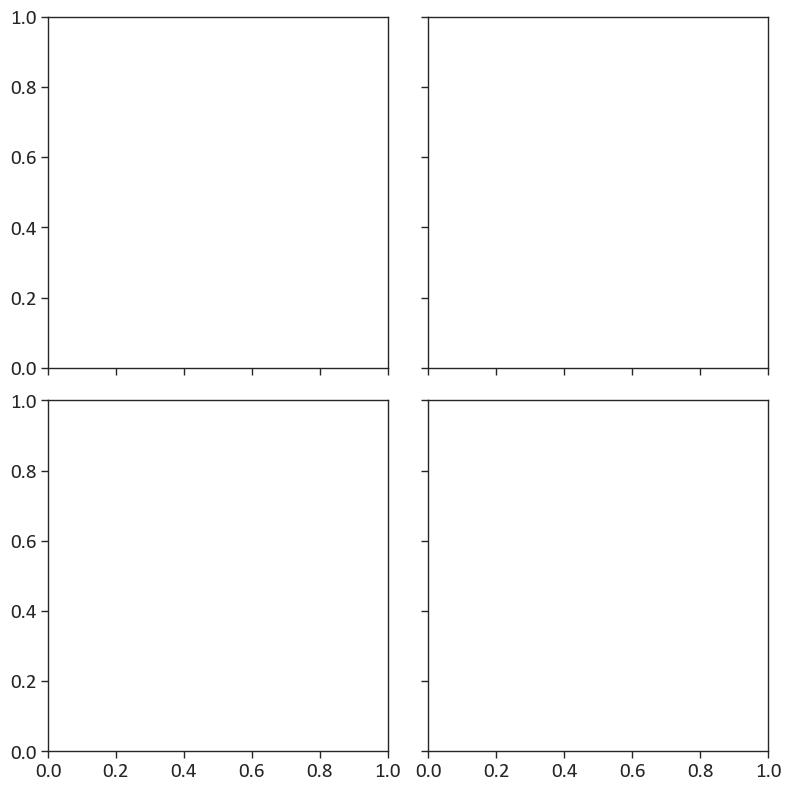

In [9]:
fig, ax = plt.subplots(2,2, constrained_layout=True, tight_layout=True, sharex=True, sharey=True)
axid = ax.flatten()
for a in axid:
    print(a)

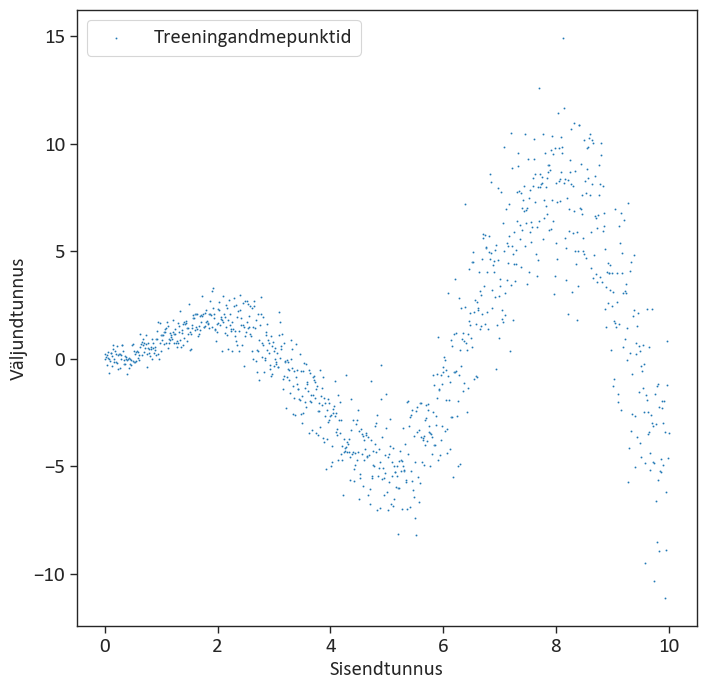

In [25]:
x = np.linspace(0, 10, 1000)
y = x * np.sin(x) + np.random.normal(0, (0.09*x**2+0.09)**0.5, len(x))
sns.scatterplot(x=x, y=y, s=2, label="Treeningandmepunktid", color=sns.color_palette()[0])
plt.xlabel("Sisendtunnus")
plt.ylabel("Väljundtunnus")
plt.legend()
plt.savefig("plots/kirjalik_osa/2.1_regressioon.png")

In [11]:
from sklearn.linear_model import LinearRegression

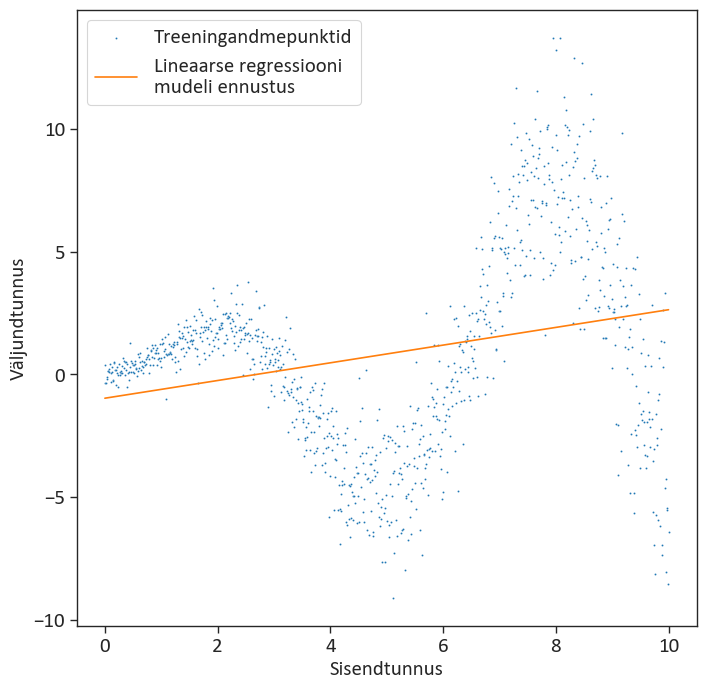

In [26]:
x = np.linspace(0, 10, 1000)
y = x * np.sin(x) + np.random.normal(0, (0.09*x**2+0.09)**0.5, len(x))
model = LinearRegression()
model.fit(x.reshape(-1,1), y)
sns.scatterplot(x=x, y=y, s=2, label="Treeningandmepunktid", color=sns.color_palette()[0])
sns.lineplot(x=x, y=model.predict(x.reshape(-1,1)), label="Lineaarse regressiooni\nmudeli ennustus", color=sns.color_palette()[1])
plt.xlabel("Sisendtunnus")
plt.ylabel("Väljundtunnus")
plt.legend()
plt.savefig("plots/kirjalik_osa/2.2_linear_estimate.png")

In [35]:
def train_model(
    trainX: np.ndarray,
    nn_size: tuple[int, int] = (20, 20),
    optimizer: keras.optimizers = keras.optimizers.Adam(
        learning_rate=0.003, amsgrad=True, epsilon=1e-3),
    epochs: int = 1000,
    batch_size: int = None,
    fn=lambda x: 0*x,
    noise_fn=lambda x: 0.3 *
        np.random.randn(len(x)) + 0.3 * x * np.random.randn(len(x)),
    reverse_fn: bool = False,
    reverse_noise: bool = False,
    seed: int = None
) -> tuple[keras.Model, keras.callbacks.History, tuple[np.ndarray, np.ndarray]]:
    """Mudeli treenimine, voib kasutada erinevaid funktsioone ja mÃ¼ra, tagastab mudeli, ajaloo ja treeningandmed

    :param trainX: treeningX andmed
    :param nn_size: vorgu kihtide suurused, hetkel ainult 2 kihti lubatud, defaults to (20, 20)
    :param optimizer: optimiseerija, hetkel valitud hea vÃ¤iksematele andmehulkadele, defaults to keras.optimizers.Adam( learning_rate=0.003, amsgrad=True, epsilon=1e-3)
    :param epochs: epochide kogus, defaults to 1000
    :param batch_size: batch size, kasutab valemit min(16, kahe aste mis > len(X)/5), defaults to 16
    :param fn: funktsioon mida oppida, defaults to lambdax:0*x
    :param noise_fn: mÃ¼rafn, defaults to lambdax:0.3*np.random.randn(len(x))+0.3*x*np.random.randn(len(x))
    :param reverse_fn: kas pÃ¶Ã¶rata fn tagurpidi, defaults to False
    :param reverse_noise: kas pÃ¶Ã¶rata mÃ¼ra tagurpidi, defaults to False
    :param seed: seed, defaults to 42
    :return: treenitud mudel, ajalugu, treeningandmed
    """

    if seed:
        utils.reset_seeds(seed)

    model = keras.Sequential([
        layers.Input(shape=(1,)),
        layers.Dense(units=nn_size[0], activation='relu', name="layer_1"),
        layers.Dense(units=nn_size[1], activation='relu', name="layer_2"),
        layers.Dense(units=2, activation='linear', name="layer_3")
    ])

    X = trainX

    # koik voimalikud kombod reverse_fn ja reverse_noise. Default on tavalist pidi
    y = fn(X) + noise_fn(X)

    X_train, y_train = X, y

    model.compile(
        optimizer=optimizer,
        loss=utils.neg_log_likelihood,
    )

    if batch_size is None:
        batch_size = min(16, max(2, 2**int(np.log2(len(trainX)/5+0.001)+1)))

    # TODO: validation_batch_size ja validation_freq saab kasutada et vaadata kuidas viga treeningu jooksul muutub
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0,
                  callbacks=[CustomLogger(100)], shuffle=True, )
    return model, h, (X_train, y_train)


Epoch:   0 | Loss: 3.32659e+00


In [48]:
X = np.linspace(0, 10, 2000)
model, _h, (X_train, y_train) = train_model(X, epochs=3000, batch_size=16, 
                                            fn=lambda x: x * np.sin(x),
                                            noise_fn=lambda x: np.random.normal(0, (0.09*x**2+0.09)**0.5, len(x)), 
                                            seed=0)

Epoch:   0 | Loss: 3.35039e+00
Epoch: 100 | Loss: 1.72930e+00
Epoch: 200 | Loss: 1.51908e+00
Epoch: 300 | Loss: 1.51552e+00
Epoch: 400 | Loss: 1.52095e+00
Epoch: 500 | Loss: 1.51253e+00
Epoch: 600 | Loss: 1.50957e+00
Epoch: 700 | Loss: 1.50459e+00
Epoch: 800 | Loss: 1.49742e+00
Epoch: 900 | Loss: 1.51686e+00
Epoch: 1000 | Loss: 1.50489e+00
Epoch: 1100 | Loss: 1.50450e+00
Epoch: 1200 | Loss: 1.50458e+00
Epoch: 1300 | Loss: 1.51642e+00
Epoch: 1400 | Loss: 1.53246e+00
Epoch: 1500 | Loss: 1.51576e+00
Epoch: 1600 | Loss: 1.51044e+00
Epoch: 1700 | Loss: 1.51133e+00
Epoch: 1800 | Loss: 1.50144e+00
Epoch: 1900 | Loss: 1.50442e+00
Epoch: 2000 | Loss: 1.50546e+00
Epoch: 2100 | Loss: 1.49369e+00
Epoch: 2200 | Loss: 1.50204e+00
Epoch: 2300 | Loss: 1.49438e+00
Epoch: 2400 | Loss: 1.50211e+00
Epoch: 2500 | Loss: 1.49867e+00
Epoch: 2600 | Loss: 1.49551e+00
Epoch: 2700 | Loss: 1.49936e+00
Epoch: 2800 | Loss: 1.49700e+00
Epoch: 2900 | Loss: 1.51747e+00


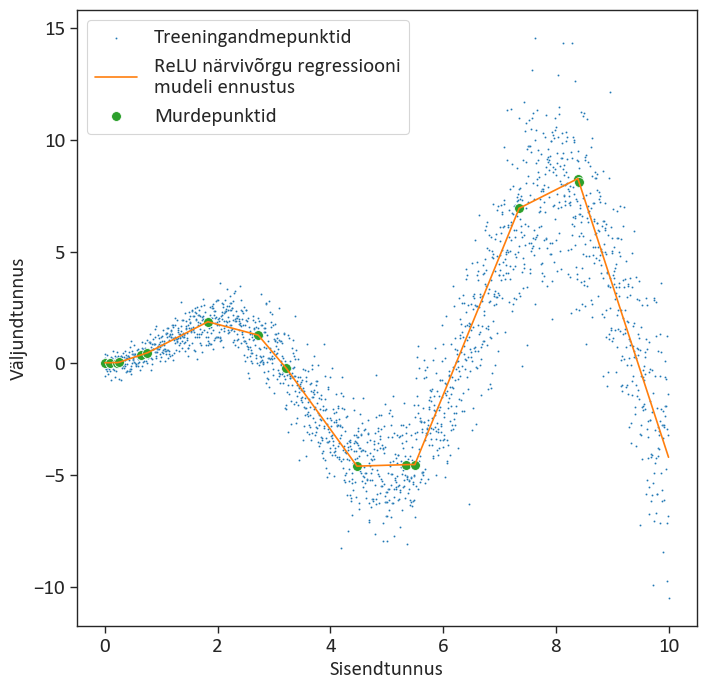

In [50]:
X_test = np.linspace(0, 10, 10000)

y = X * np.sin(X) + np.random.normal(0, (0.09*X**2+0.09)**0.5, len(X))

sns.scatterplot(x=X, y=y, s=2, label="Treeningandmepunktid",
                color=sns.color_palette()[0])
y_pred_mean = model.predict(X_test.reshape(-1, 1), verbose=0)[:, 0]

bpoints = Slopes.new_breakpoint_finder(model, X_test)[:]
bpoints = [bp[0] for bp in bpoints]
temp_bpoints = list(zip(*bpoints))
bx, by = temp_bpoints[0], temp_bpoints[1]

sns.lineplot(x=X_test, y=y_pred_mean,
             label="ReLU närvivõrgu regressiooni\nmudeli ennustus", color=sns.color_palette()[1])
sns.scatterplot(x=bx, y=by, s=50, label="Murdepunktid", alpha=1,
                color=sns.color_palette()[2])
plt.xlabel("Sisendtunnus")
plt.ylabel("Väljundtunnus")
plt.legend()
plt.savefig("plots/kirjalik_osa/2.3_relu_estimate.png")


In [52]:
model

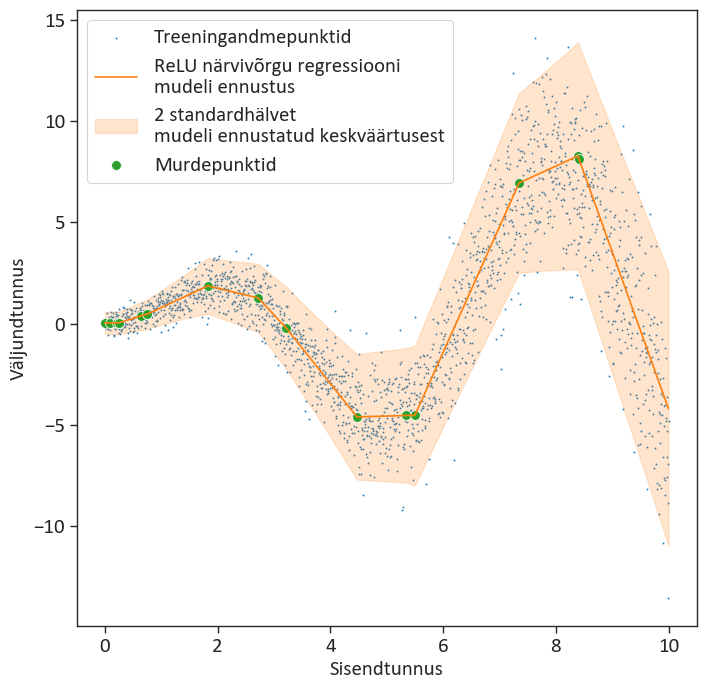

In [54]:
X_test = np.linspace(0, 10, 10000)

y = X * np.sin(X) + np.random.normal(0, (0.09*X**2+0.09)**0.5, len(X))

sns.scatterplot(x=X, y=y, s=2, label="Treeningandmepunktid",
                color=sns.color_palette()[0])
y_pred = model.predict(X_test.reshape(-1, 1), verbose=0)
y_pred_mean = y_pred[:, 0]
y_pred_logvar = y_pred[:, 1]
y_pred_var = np.exp(y_pred_logvar)
y_pred_sd = np.sqrt(y_pred_var)

bpoints = Slopes.new_breakpoint_finder(model, X_test)[:]
bpoints = [bp[0] for bp in bpoints]
temp_bpoints = list(zip(*bpoints))
bx, by = temp_bpoints[0], temp_bpoints[1]

sns.lineplot(x=X_test, y=y_pred_mean,
             label="ReLU närvivõrgu regressiooni\nmudeli ennustus", color=sns.color_palette()[1])
n_variances=2
plt.fill_between(X_test, y_pred_mean - n_variances*y_pred_sd,
                         y_pred_mean + n_variances*y_pred_sd, alpha=0.2, label=f"2 standardhälvet\nmudeli ennustatud keskväärtusest", color=sns.color_palette()[1])
sns.scatterplot(x=bx, y=by, s=50, label="Murdepunktid", alpha=1,
                color=sns.color_palette()[2])
plt.xlabel("Sisendtunnus")
plt.ylabel("Väljundtunnus")
plt.legend()
plt.savefig("plots/kirjalik_osa/2.6_relu_estimate_variance.png")
